In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#File to Load (Remember to Change These)
Clinical_Trial_File = "Clinical_Trial_Data.csv"
Mouse_Drug_File = "Mouse_Drug_Data.csv"

#Read the Mouse and Drug Data and the Clinical Trial Data
Clinical_Trial = pd.read_csv(Clinical_Trial_File)
Mouse_Drug = pd.read_csv(Mouse_Drug_File)

In [2]:
#Display CLinical Trial Data head
Clinical_Trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Display Mouse Drug Data head
Mouse_Drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
#Combine the data into a single dataset
Merged_Files = pd.merge(Clinical_Trial, Mouse_Drug, on=("Mouse ID"))

#Display the data table for preview
Merged_Files.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
                                            # Tumor Response to Treatment
#Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Volume_Data = Merged_Files.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
Tumor_Volume_Data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [6]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#Convert to DataFrame
#Preview DataFrame
Mean_TV = pd.DataFrame(Tumor_Volume_Data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
Mean_TV.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#Convert to DataFrame
#Preview DataFrame
Standard_Error_TV = pd.DataFrame(Tumor_Volume_Data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem())
Standard_Error_TV.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
#Merging and Renaming both DataFrames
M_SE_TV = pd.merge(Mean_TV, Standard_Error_TV, on=("Drug", "Timepoint"))
M_SE_TV.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Standard Error Tumor Volume"}, inplace=True)
M_SE_TV.head()

Mean Tumor Volume  Standard Error Tumor Volume
Drug      Timepoint                                                
Capomulin 0                  45.000000                     0.000000
          5                  44.266086                     0.448593
          10                 43.084291                     0.702684
          15                 42.064317                     0.838617
          20                 40.716325                     0.909731

In [9]:
#Minor Data Munging to Re-Format the Data Frames: Mean Tumor Volumes
#Preview that Reformatting worked
Tumor_Volume_M = M_SE_TV.pivot_table(index="Timepoint", columns="Drug", values="Mean Tumor Volume")
Tumor_Volume_M.head(50)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
#Minor Data Munging to Re-Format the Data Frames: Standard Error Volumes
#Preview that Reformatting worked
Tumor_Volume_SD = M_SE_TV.pivot_table(index="Timepoint", columns="Drug", values="Standard Error Tumor Volume")
Tumor_Volume_SD.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


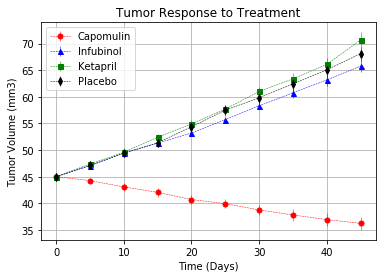

In [11]:
#Generate the Plot (with Error Bars)
plt.errorbar(Tumor_Volume_M.index, Tumor_Volume_M["Capomulin"], yerr=Tumor_Volume_SD["Capomulin"],
             color="r", marker="o", markersize=5, linestyle="--", linewidth=0.5)

plt.errorbar(Tumor_Volume_M.index, Tumor_Volume_M["Infubinol"], yerr=Tumor_Volume_SD["Infubinol"],
             color="b", marker="^", markersize=5, linestyle="--", linewidth=0.5)

plt.errorbar(Tumor_Volume_M.index, Tumor_Volume_M["Ketapril"], yerr=Tumor_Volume_SD["Ketapril"],
             color="g", marker="s", markersize=5, linestyle="--", linewidth=0.5)

plt.errorbar(Tumor_Volume_M.index, Tumor_Volume_M["Placebo"], yerr=Tumor_Volume_SD["Placebo"],
             color="black", marker="d", markersize=5, linestyle="--", linewidth=0.5)

x_lim = len(Tumor_Volume_M.index)
#Chart title
plt.title("Tumor Response to Treatment")
#x-axis Label
plt.xlabel("Time (Days)")
#y-axis Label
plt.ylabel("Tumor Volume (mm3)")
#Legend 
plt.legend(loc = "best", frameon=True)
plt.grid()

#Save Figure
plt.savefig("Tumor Response to Treatment")

#Show the Figure
plt.show()

In [12]:
                                            # Metastatic Response to Treatment
#Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Convert to DataFrame
#Preview DataFrame
Mean_MS = pd.DataFrame(Merged_Files.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())
Mean_MS.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:
#Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Convert to DataFrame
#Preview DataFrame
Standard_Error_MS = pd.DataFrame(Merged_Files.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem())
Standard_Error_MS.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
#Merging and Renaming both DataFrames
M_SE_MS = pd.merge(Mean_MS, Standard_Error_MS, on=("Drug", "Timepoint"))
M_SE_MS.rename(columns={"Metastatic Sites_x": "Mean Metastatic Sites", "Metastatic Sites_y": "Standard Error Metastatic Sites"}, inplace=True)
M_SE_MS.head()

Mean Metastatic Sites  Standard Error Metastatic Sites
Drug      Timepoint                                                        
Capomulin 0                       0.000000                         0.000000
          5                       0.160000                         0.074833
          10                      0.320000                         0.125433
          15                      0.375000                         0.132048
          20                      0.652174                         0.161621

In [15]:
#Minor Data Munging to Re-Format the Data Frames: Mean Metastatic Sites
#Preview that Reformatting worked
Metastatic_Sites_M = M_SE_MS.pivot_table(index="Timepoint", columns="Drug", values="Mean Metastatic Sites")
Metastatic_Sites_M.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [16]:
#Minor Data Munging to Re-Format the Data Frames: Standard Error Metastatic Sites
#Preview that Reformatting worked
Metastatic_Sites_SD = M_SE_MS.pivot_table(index="Timepoint", columns="Drug", values="Standard Error Metastatic Sites")
Metastatic_Sites_SD.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


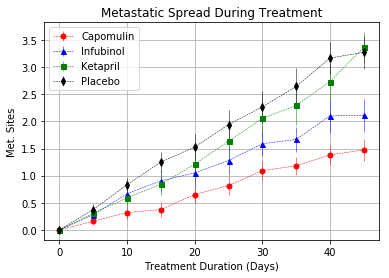

In [17]:
#Generate the Plot (with Error Bars)
plt.errorbar(Metastatic_Sites_M.index, Metastatic_Sites_M["Capomulin"], yerr=Metastatic_Sites_SD["Capomulin"],
             color="r", marker="o", markersize=5, linestyle="--", linewidth=0.5)

plt.errorbar(Metastatic_Sites_M.index, Metastatic_Sites_M["Infubinol"], yerr=Metastatic_Sites_SD["Infubinol"],
             color="b", marker="^", markersize=5, linestyle="--", linewidth=0.5)

plt.errorbar(Metastatic_Sites_M.index, Metastatic_Sites_M["Ketapril"], yerr=Metastatic_Sites_SD["Ketapril"],
             color="g", marker="s", markersize=5, linestyle="--", linewidth=0.5)

plt.errorbar(Metastatic_Sites_M.index, Metastatic_Sites_M["Placebo"], yerr=Metastatic_Sites_SD["Placebo"],
             color="black", marker="d", markersize=5, linestyle="--", linewidth=0.5)

x_lim = len(Metastatic_Sites_M.index)
#Chart title
plt.title("Metastatic Spread During Treatment")
#x-axis Label
plt.xlabel("Treatment Duration (Days)")
#y-axis Label
plt.ylabel("Met. Sites")
#Legend 
plt.legend(loc = "best", frameon=True)
plt.grid()

#Save Figure
plt.savefig("Metastatic Spread During Treatment")

#Show the Figure
plt.show()

In [18]:
                                                # Survival Rates
#Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#Convert to DataFrame
#Preview DataFrame
Mouse_Count = pd.DataFrame(Merged_Files.groupby(["Drug","Timepoint"])["Mouse ID"].count())
Mouse_Count.rename(columns={"Mouse ID": "Mouse Count"}, inplace=True)
Mouse_Count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [19]:
#Re-Formating DataFrames
#Preview the DataFrame
Survival_Rate_M = Mouse_Count.pivot_table(values=["Mouse Count"],index=["Timepoint"],columns=["Drug"],aggfunc="mean")
Survival_Rate_M.columns = Survival_Rate_M.columns.droplevel()
Survival_Rate_M.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [20]:
Survival_Percentage = Survival_Rate_M.copy()
Survival_Percentage = round(Survival_Percentage.apply(lambda c: c / c.max() * 100, axis=0),2)
Survival_Percentage.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0


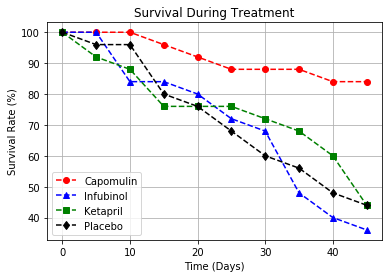

In [21]:
#Generate the Plot (Accounting for percentages)
Survival_Rate =  Survival_Percentage.index

plt.plot(Survival_Rate, Survival_Percentage["Capomulin"], color="r", marker ="o", linestyle="--", label="Capomulin")
plt.plot(Survival_Rate, Survival_Percentage["Infubinol"], color="b", marker ="^", linestyle="--", label="Infubinol")
plt.plot(Survival_Rate, Survival_Percentage["Ketapril"], color="g", marker ="s", linestyle="--", label="Ketapril")
plt.plot(Survival_Rate, Survival_Percentage["Placebo"], color="black", marker ="d", linestyle="--", label="Placebo")

#Chart Title
plt.title("Survival During Treatment")
#x-axis Label
plt.xlabel("Time (Days)")
#y-axis Label
plt.ylabel("Survival Rate (%)")
#Legend 
plt.legend(loc = "best", frameon=True)
plt.grid()

#Save the Figure
plt.savefig("Survival During Treatment")

#Show the Figure
plt.show()

In [22]:
                                                # Summary Bar Graph
#Calculate the percent changes for each drug
#Display the data to confirm
#Percent_Change_Per_Drug = (((Tumor_Volume_Data.iloc[-1]-Tumor_Volume_Data.iloc[0])/Tumor_Volume_Data.iloc[0])*100).to_frame("% Change")
#Percent_Change_Per_Drug
Percent_Change_per_Drug =  ((Tumor_Volume_M.iloc[-1]-Tumor_Volume_M.iloc[0])/Tumor_Volume_M.iloc[0]) * 100
Percent_Change_per_Drug

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [23]:
#Store all Relevant Percent Changes into a Tuple
Percent_Change = list(Percent_Change_per_Drug.values)
Percent_Change

[-19.475302667894155,
 42.516491855897414,
 46.12347172785184,
 57.02879468660604,
 53.923347134769195,
 51.29796048315153,
 47.24117486320634,
 -22.32090046276666,
 52.085134287898995,
 46.57975086509522]

In [24]:
#Percent Tumor Change for Capomulin, Infubinol, Ketapril, Placebo
CIKP_Percent_Change_Per_Drug = (Tumor_Volume_M.loc[45, ["Capomulin", "Infubinol", "Ketapril", "Placebo"] ] - Tumor_Volume_M.loc[0, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]])/Tumor_Volume_M.loc[0, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]] * 100
CIKP_Percent_Change_Per_Drug

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [25]:
#Store all Relevant Percent Changes into a Tuple
CIKP_Percent_Change = list(CIKP_Percent_Change_Per_Drug.values)
CIKP_Percent_Change

[-19.475302667894155, 46.12347172785184, 57.02879468660604, 51.29796048315153]

In [26]:
#Splice the data between passing and failing drugs
Drug_Effect_Summary_Table = pd.DataFrame({"Percentage Change per Drug": Percent_Change_per_Drug})
Drug_Effect_Summary_Table["Tumor Reduction"] = Drug_Effect_Summary_Table["Percentage Change per Drug"] < 0
Drug_Effect_Summary_Table.style.background_gradient(cmap="autumn")

,Percentage Change per Drug,Tumor Reduction
Drug,,
Capomulin,-19.4753,True
Ceftamin,42.5165,False
Infubinol,46.1235,False
Ketapril,57.0288,False
Naftisol,53.9233,False
Placebo,51.298,False
Propriva,47.2412,False
Ramicane,-22.3209,True
Stelasyn,52.0851,False


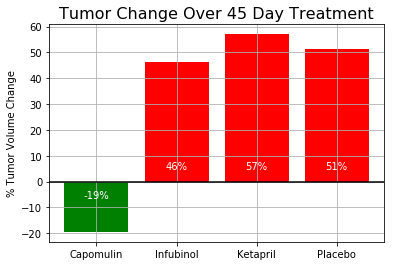

In [27]:
#Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment", fontdict = {"fontsize": 16})
plt.ylabel("% Tumor Volume Change")
plt.axhline(y=0, color = "black")

#Label Drug names
xlabels = CIKP_Percent_Change_Per_Drug.index

plt.xticks(np.arange(len(xlabels)), xlabels)


#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        CIKP_Percent_Change_Per_Drug, 
        #colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if CIKP_Percent_Change_Per_Drug[value] > 0 else 'green' for value in np.arange(len(xlabels))]
       )

counter = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for value in CIKP_Percent_Change_Per_Drug:
    if value < 0:
        y_point = -6.5
    else:
        y_point = 5
    plt.text(counter, y_point, str(int(value)) + '%', ha = 'center', color = 'white')
    counter += 1
    
#Use functions to label the percentages of changes
#Call functions to implement the function calls


#Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment")

#Show the Figure
plt.grid()
plt.show()